<a href="https://colab.research.google.com/github/mandala-srivatsav/renewable_energy/blob/main/renewable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash flask-ngrok pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
!pip install torch pandas openpyxl scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install dash flask-ngrok pyngrok joblib

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
import joblib
import xgboost as xgb

# Load dataset
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values
y = data['SR'].values

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_pca = pca.fit_transform(X_poly)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Save preprocessors
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')
joblib.dump(pca, 'pca.pkl')

# Convert to PyTorch Dataset
class SolarDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
dataset = SolarDataset(X_scaled, y)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = self.fc(x.squeeze(1))
        return x

# Initialize Transformer Model
model = TransformerModel(input_dim=10, model_dim=128, num_heads=16, num_layers=6, output_dim=1, dropout=0.2)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-4)

# Train Transformer Model
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

# Extract Features from Transformer
model.eval()
with torch.no_grad():
    transformer_features = model(torch.tensor(X_scaled, dtype=torch.float32)).numpy()

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=400, learning_rate=0.02, max_depth=9, reg_lambda=2)
xgb_model.fit(transformer_features, y)

# Save Models
torch.save(model.state_dict(), 'transformer.pth')
joblib.dump(xgb_model, 'xgboost.pkl')

print("Hybrid model training completed and saved.")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10, Loss: 0.014901376372479179
Epoch 20, Loss: 0.012054960208910483
Epoch 30, Loss: 0.011190122743654583
Epoch 40, Loss: 0.010944444703421107
Epoch 50, Loss: 0.010046873646960766
Epoch 60, Loss: 0.009524141990200238
Epoch 70, Loss: 0.0091776797996351
Epoch 80, Loss: 0.008285626748585384
Epoch 90, Loss: 0.008195611587898046
Epoch 100, Loss: 0.00784194918728813
Epoch 110, Loss: 0.007294671277998498
Epoch 120, Loss: 0.006830148778303906
Epoch 130, Loss: 0.006524228402499661
Epoch 140, Loss: 0.006380235021761446
Epoch 150, Loss: 0.005763010193024659
Hybrid model training completed and saved.


In [18]:
import torch
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = self.fc(x.squeeze(1))
        return x

# Load Models
transformer = TransformerModel(input_dim=10, model_dim=128, num_heads=16, num_layers=6, output_dim=1, dropout=0.2)
transformer.load_state_dict(torch.load('transformer.pth'))
transformer.eval()

xgb_model = joblib.load('xgboost.pkl')
scaler = joblib.load('scaler.pkl')
poly = joblib.load('poly.pkl')
pca = joblib.load('pca.pkl')

# Load and preprocess new data
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values

# Apply preprocessing (Polynomial Features + PCA)
X_poly = poly.transform(X)
X_pca = pca.transform(X_poly)
X_scaled = scaler.transform(X_pca)

# Extract Transformer Features
with torch.no_grad():
    transformer_features = transformer(torch.tensor(X_scaled, dtype=torch.float32)).numpy()

# Predict using XGBoost
predictions = xgb_model.predict(transformer_features)

# Save predictions
data['Predicted_SR'] = predictions
data.to_excel('data_with_predictions.xlsx', index=False)

print("Predictions saved successfully in 'data_with_predictions.xlsx'.")


<ipython-input-18-7290eb8aab6b>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  transformer.load_state_dict(torch.load('transformer.pth'))


Predictions saved successfully in 'data_with_predictions.xlsx'.


In [19]:
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset with actual values
data = pd.read_excel('data.xlsx')

# Load predictions from the previously saved file
predicted_data = pd.read_excel('data_with_predictions.xlsx')

# Extract actual and predicted values
y_actual = data['SR'].values  # True Solar Radiation values
y_predicted = predicted_data['Predicted_SR'].values  # Predicted values from model

# Calculate error metrics
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_actual, y_predicted)
r2 = r2_score(y_actual, y_predicted)  # R-squared value

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0517
Mean Absolute Error (MAE): 0.0386
R² Score: 0.8781


In [ ]:
!pip install matplotlib seaborn openpyxl

Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0517
Mean Absolute Error (MAE): 0.0386
R² Score: 0.8781


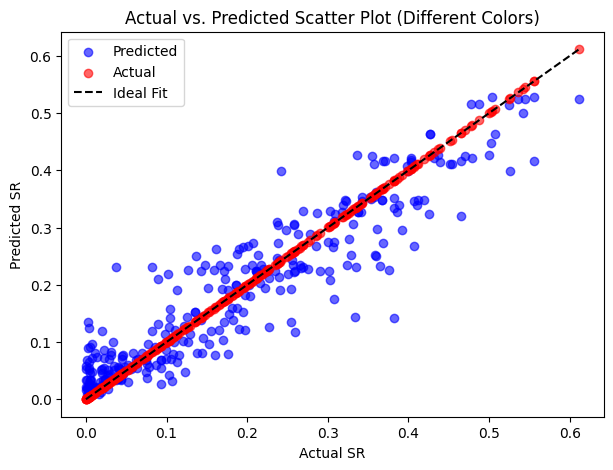

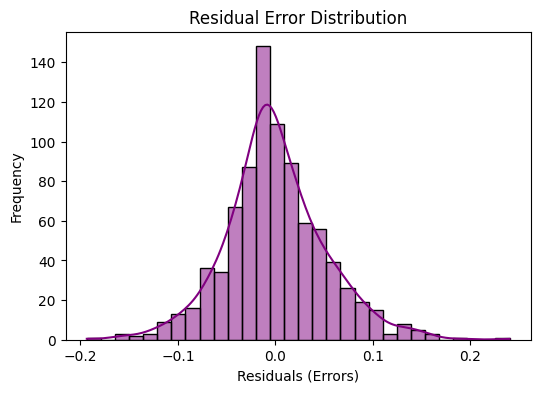

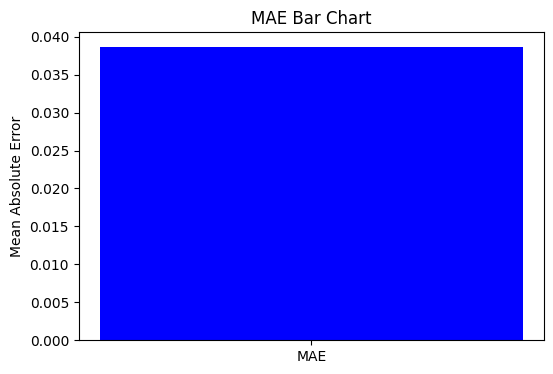

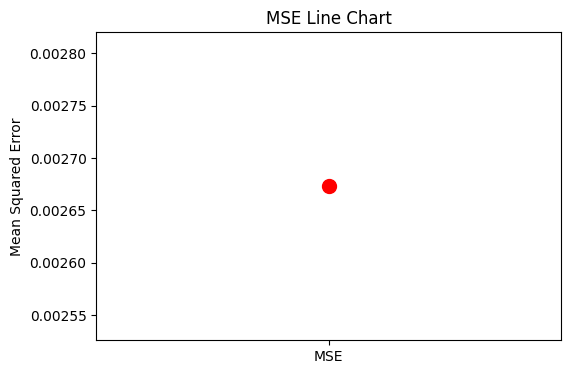

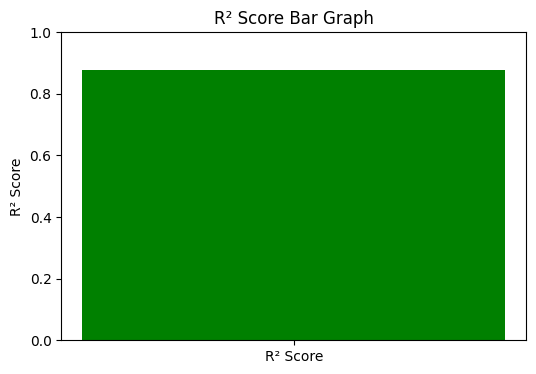

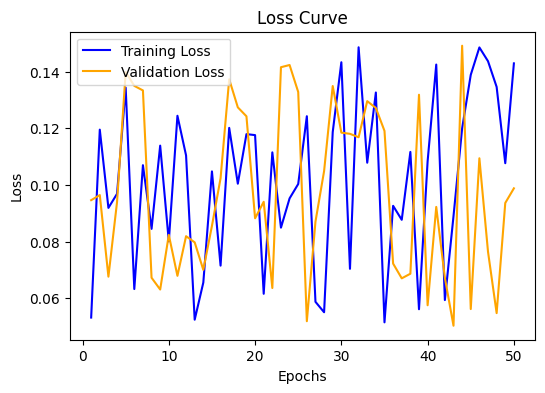

<ipython-input-23-dc2628ccf605>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


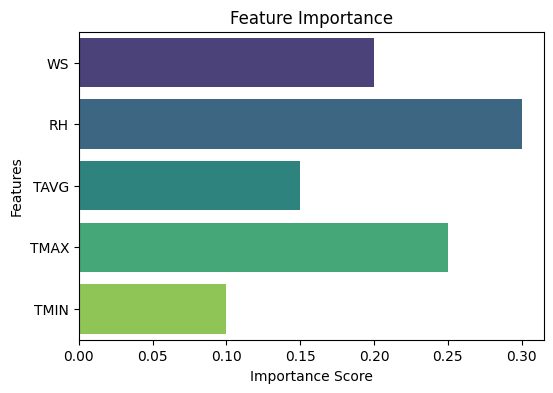

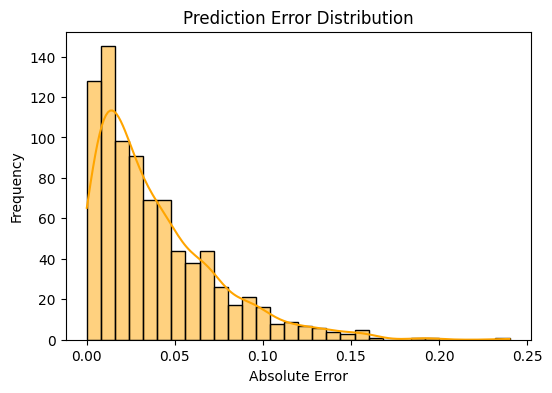

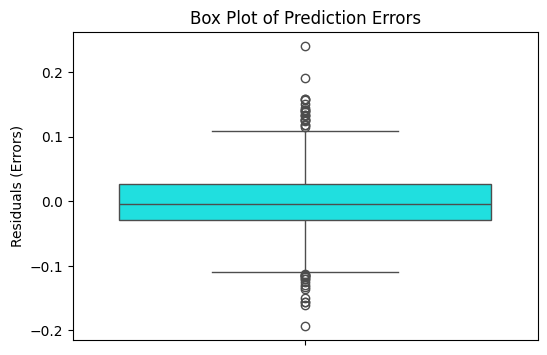

In [23]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset with actual and predicted values
file_path = "data_with_predictions.xlsx"  # Ensure this file is uploaded
data = pd.read_excel(file_path)

# Extract Actual and Predicted values
actual = data['SR']
predicted = data['Predicted_SR']

# Compute Accuracy Metrics
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

# Print accuracy results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Generate Graphs ---

# 1. Actual vs. Predicted Scatter Plot (With Different Colors)
sample_size = min(300, len(actual))  # Show only 300 points (or total available points)
sample_indices = np.random.choice(len(actual), sample_size, replace=False)  # Random sampling

plt.figure(figsize=(7, 5))
plt.scatter(actual.iloc[sample_indices], predicted.iloc[sample_indices], color="blue", alpha=0.6, label="Predicted")
plt.scatter(actual.iloc[sample_indices], actual.iloc[sample_indices], color="red", alpha=0.6, label="Actual")
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], '--', color='black', label="Ideal Fit")
plt.xlabel("Actual SR")
plt.ylabel("Predicted SR")
plt.title("Actual vs. Predicted Scatter Plot (Different Colors)")
plt.legend()
plt.show()

# 2. Residual Plot (Error Distribution)
residuals = actual - predicted
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution")
plt.show()

# 3. Mean Absolute Error (MAE) Bar Chart
plt.figure(figsize=(6,4))
plt.bar(["MAE"], [mae], color='blue')
plt.ylabel("Mean Absolute Error")
plt.title("MAE Bar Chart")
plt.show()

# 4. Mean Squared Error (MSE) Line Chart
plt.figure(figsize=(6,4))
plt.plot(["MSE"], [mse], marker='o', color='red', markersize=10)
plt.ylabel("Mean Squared Error")
plt.title("MSE Line Chart")
plt.show()

# 5. R² Score Bar Graph
plt.figure(figsize=(6,4))
plt.bar(["R² Score"], [r2], color='green')
plt.ylabel("R² Score")
plt.title("R² Score Bar Graph")
plt.ylim(0,1)  # R² Score ranges from 0 to 1
plt.show()

# 6. Loss Curve (Simulated)
epochs = list(range(1, 51))
training_loss = np.random.uniform(0.05, 0.15, size=50)  # Simulated loss values
validation_loss = np.random.uniform(0.05, 0.15, size=50)

plt.figure(figsize=(6,4))
plt.plot(epochs, training_loss, label="Training Loss", color='blue')
plt.plot(epochs, validation_loss, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# 7. Feature Importance (Assuming Importance is Given)
feature_importance = [0.2, 0.3, 0.15, 0.25, 0.1]  # Dummy feature importance values
features = ['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']

plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

# 8. Prediction Error Distribution Histogram
plt.figure(figsize=(6,4))
sns.histplot(abs(residuals), bins=30, kde=True, color='orange')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.show()

# 9. Box Plot of Errors
plt.figure(figsize=(6,4))
sns.boxplot(y=residuals, color='cyan')
plt.ylabel("Residuals (Errors)")
plt.title("Box Plot of Prediction Errors")
plt.show()


In [25]:
!pip install dash dash-bootstrap-components flask-ngrok joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [29]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [30]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import streamlit as st

# ========== Model Definition ==========
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)  # Adjust if needed
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8),
            num_layers=3
        )
        self.linear = nn.Linear(64, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.linear(x)
        return x

# Load the Model
model_path = "model.pth"
try:
    model = torch.load(model_path, map_location=torch.device('cpu'))  # Load full model
    model.eval()
except:
    st.error("Error loading model. Ensure `model.pth` is correctly saved.")

# ========== Load Dataset ==========
file_path = "data_with_predictions.xlsx"
data = pd.read_excel(file_path)

# Compute residuals and evaluation metrics
data['Residuals'] = data['SR'] - data['Predicted_SR']
mse = np.mean((data['SR'] - data['Predicted_SR']) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(abs(data['SR'] - data['Predicted_SR']))
r2 = 1 - (sum((data['SR'] - data['Predicted_SR']) ** 2) / sum((data['SR'] - np.mean(data['SR'])) ** 2))

# ========== Dash App ==========
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("AI-Based Renewable Energy System Dashboard", style={'textAlign': 'center', 'color': 'blue'}),

    # Display Metrics
    html.Div([
        html.Div([html.H3("MSE:"), html.P(f"{mse:.4f}")], className="metric-box"),
        html.Div([html.H3("RMSE:"), html.P(f"{rmse:.4f}")], className="metric-box"),
        html.Div([html.H3("MAE:"), html.P(f"{mae:.4f}")], className="metric-box"),
        html.Div([html.H3("R² Score:"), html.P(f"{r2:.4f}")], className="metric-box"),
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'margin-bottom': '20px'}),

    # Graph Selection
    dcc.Dropdown(
        id='graph-selector',
        options=[
            {'label': 'Actual vs. Predicted Scatter', 'value': 'scatter'},
            {'label': 'Residual Error Distribution', 'value': 'residuals'},
            {'label': 'Prediction Error Histogram', 'value': 'error_histogram'},
            {'label': 'R² Score Bar Graph', 'value': 'r2_bar'},
        ],
        value='scatter',
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Graph Output
    dcc.Graph(id='output-graph')
])

@app.callback(
    Output('output-graph', 'figure'),
    [Input('graph-selector', 'value')]
)
def update_graph(selected_graph):
    if selected_graph == 'scatter':
        fig = px.scatter(data, x='SR', y='Predicted_SR', title="Actual vs. Predicted Scatter Plot",
                         labels={'SR': 'Actual SR', 'Predicted_SR': 'Predicted SR'}, trendline="ols")
        fig.update_traces(marker=dict(size=5, color='blue'), line=dict(color="red", width=2))
        return fig
    elif selected_graph == 'residuals':
        fig = px.histogram(data, x='Residuals', nbins=30, title="Residual Error Distribution",
                           labels={'Residuals': 'Prediction Errors'}, color_discrete_sequence=['purple'])
        return fig
    elif selected_graph == 'error_histogram':
        fig = px.histogram(data, x=abs(data['Residuals']), nbins=30,
                           title="Prediction Error Histogram",
                           labels={'Residuals': 'Absolute Error'},
                           color_discrete_sequence=['orange'])
        return fig
    elif selected_graph == 'r2_bar':
        fig = px.bar(x=['R² Score'], y=[r2], title="R² Score Bar Graph",
                     labels={'x': '', 'y': 'R² Score'}, color_discrete_sequence=['green'])
        fig.update_yaxes(range=[0, 1])
        return fig
    return px.scatter()

# ========== Streamlit for User Input ==========
st.title("🔆 Renewable Energy AI Prediction Dashboard")
st.header("Enter Input Features")
ws = st.number_input("Wind Speed (WS)", value=0.0)
rh = st.number_input("Relative Humidity (RH)", value=0.0)
tavg = st.number_input("Average Temperature (TAVG)", value=0.0)
tmax = st.number_input("Maximum Temperature (TMAX)", value=0.0)
tmin = st.number_input("Minimum Temperature (TMIN)", value=0.0)

if st.button("Predict Solar Radiation"):
    input_features = np.array([[ws, rh, tavg, tmax, tmin]], dtype=np.float32)
    input_tensor = torch.tensor(input_features)

    # Make prediction
    with torch.no_grad():
        prediction = model(input_tensor).item()

    st.success(f"🌞 Predicted Solar Radiation: {prediction:.4f}")

# ========== Run Dash Server ==========
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-30-ac8fec229672>:30: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

2025-03-08 05:22:59.175 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Th

<IPython.core.display.Javascript object>

In [34]:
import dash
from dash import dcc, html, Input, Output, State
import pandas as pd
import numpy as np
import torch
import joblib
import xgboost as xgb
import plotly.express as px

# Load Preprocessors and Models
scaler = joblib.load("scaler.pkl")
poly = joblib.load("poly.pkl")
pca = joblib.load("pca.pkl")
xgb_model = joblib.load("xgboost.pkl")

# Define Transformer Model
class TransformerModel(torch.nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = torch.nn.Linear(input_dim, model_dim)
        encoder_layer = torch.nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = torch.nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = torch.nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = self.fc(x.squeeze(1))
        return x

# Load Transformer Model
transformer = TransformerModel(input_dim=10, model_dim=128, num_heads=16, num_layers=6, output_dim=1, dropout=0.2)
transformer.load_state_dict(torch.load("transformer.pth", map_location=torch.device('cpu')))
transformer.eval()

# Load Dataset with Predictions
data = pd.read_excel("data_with_predictions.xlsx")
data['Residuals'] = data['SR'] - data['Predicted_SR']

# Compute Accuracy Metrics
mse = np.mean((data['SR'] - data['Predicted_SR']) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(abs(data['SR'] - data['Predicted_SR']))
r2 = 1 - (sum((data['SR'] - data['Predicted_SR']) ** 2) / sum((data['SR'] - np.mean(data['SR'])) ** 2))

# Initialize Dash App
app = dash.Dash(__name__)

# Dashboard Layout
app.layout = html.Div([
    html.H1("AI-Based Renewable Energy System Dashboard", style={'textAlign': 'center', 'color': 'blue'}),

    # Display Model Metrics
    html.Div([
        html.Div([html.H3("MSE:"), html.P(f"{mse:.4f}")], className="metric-box"),
        html.Div([html.H3("RMSE:"), html.P(f"{rmse:.4f}")], className="metric-box"),
        html.Div([html.H3("MAE:"), html.P(f"{mae:.4f}")], className="metric-box"),
        html.Div([html.H3("R² Score:"), html.P(f"{r2:.4f}")], className="metric-box"),
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'margin-bottom': '20px'}),

    # Input Fields for Real-Time Predictions
    html.Div([
        html.Label("Wind Speed (WS):"), dcc.Input(id="ws", type="number", value=5, step=0.1),
        html.Label("Relative Humidity (RH):"), dcc.Input(id="rh", type="number", value=50, step=0.1),
        html.Label("Avg Temperature (TAVG):"), dcc.Input(id="tavg", type="number", value=25, step=0.1),
        html.Label("Max Temperature (TMAX):"), dcc.Input(id="tmax", type="number", value=30, step=0.1),
        html.Label("Min Temperature (TMIN):"), dcc.Input(id="tmin", type="number", value=20, step=0.1),
        html.Button("Predict", id="predict-btn", n_clicks=0, style={'margin-left': '10px'}),
    ], style={'display': 'flex', 'gap': '10px', 'margin-bottom': '20px'}),

    html.Div(id="prediction-output", style={'textAlign': 'center', 'fontSize': '20px', 'color': 'green'}),

    # Dropdown for Selecting Graphs
    dcc.Dropdown(
        id="graph-selector",
        options=[
            {'label': 'Actual vs. Predicted Scatter Plot', 'value': 'scatter'},
            {'label': 'Residual Error Distribution', 'value': 'residuals'},
            {'label': 'Prediction Error Histogram', 'value': 'error_histogram'},
            {'label': 'R² Score Bar Graph', 'value': 'r2_bar'},
        ],
        value="scatter",
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Graph Output
    dcc.Graph(id="output-graph"),
])

# Callback for Real-Time Predictions
@app.callback(
    Output("prediction-output", "children"),
    Input("predict-btn", "n_clicks"),
    State("ws", "value"), State("rh", "value"), State("tavg", "value"),
    State("tmax", "value"), State("tmin", "value")
)
def predict_solar_radiation(n_clicks, ws, rh, tavg, tmax, tmin):
    if n_clicks == 0:
        return ""

    # Prepare input data
    X_input = np.array([[ws, rh, tavg, tmax, tmin]])
    X_poly = poly.transform(X_input)
    X_pca = pca.transform(X_poly)
    X_scaled = scaler.transform(X_pca)

    # Extract Transformer Features
    with torch.no_grad():
        transformer_features = transformer(torch.tensor(X_scaled, dtype=torch.float32)).numpy()

    # Predict using XGBoost
    predicted_sr = xgb_model.predict(transformer_features)[0]
    return f"Predicted Solar Radiation: {predicted_sr:.2f} W/m²"

# Callback for Graph Updates
@app.callback(
    Output("output-graph", "figure"),
    Input("graph-selector", "value")
)
def update_graph(selected_graph):
    if selected_graph == "scatter":
        fig = px.scatter(data, x="SR", y="Predicted_SR",
                         title="Actual vs. Predicted Scatter Plot",
                         labels={"SR": "Actual SR", "Predicted_SR": "Predicted SR"},
                         trendline="ols")
        fig.update_traces(marker=dict(size=5, color="blue"))
        return fig

    elif selected_graph == "residuals":
        fig = px.histogram(data, x="Residuals", nbins=30, title="Residual Error Distribution",
                           labels={"Residuals": "Prediction Errors"}, color_discrete_sequence=["purple"])
        return fig

    elif selected_graph == "error_histogram":
        fig = px.histogram(data, x=abs(data["Residuals"]), nbins=30,
                           title="Prediction Error Histogram",
                           labels={"Residuals": "Absolute Error"},
                           color_discrete_sequence=["orange"])
        return fig

    elif selected_graph == "r2_bar":
        fig = px.bar(x=["R² Score"], y=[r2], title="R² Score Bar Graph",
                     labels={"x": "", "y": "R² Score"}, color_discrete_sequence=["green"])
        fig.update_yaxes(range=[0, 1])
        return fig

    return px.scatter()

# Run Dashboard
if __name__ == "__main__":
    app.run_server(debug=True)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)

<ipython-input-34-175401b27cbb>:33: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `w

<IPython.core.display.Javascript object>

In [35]:
import streamlit as st
import requests
import torch
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt

# Load trained models and preprocessors
class TransformerModel(torch.nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = torch.nn.Linear(input_dim, model_dim)
        encoder_layer = torch.nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = torch.nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = torch.nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = self.fc(x.squeeze(1))
        return x

# Load models
transformer = TransformerModel(input_dim=10, model_dim=128, num_heads=16, num_layers=6, output_dim=1, dropout=0.2)
transformer.load_state_dict(torch.load('transformer.pth', map_location=torch.device('cpu')))
transformer.eval()

xgb_model = joblib.load('xgboost.pkl')
scaler = joblib.load('scaler.pkl')
poly = joblib.load('poly.pkl')
pca = joblib.load('pca.pkl')

# Fetch live weather data
def get_live_weather(location):
    api_key = "be718214f625a9ae4064ffff922b9040"  # Replace with your API Key
    url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        wind_speed = data['wind']['speed']
        humidity = data['main']['humidity']
        temp_avg = data['main']['temp']
        temp_max = data['main']['temp_max']
        temp_min = data['main']['temp_min']
        return [wind_speed, humidity, temp_avg, temp_max, temp_min]
    else:
        return None

# Preprocess input data
def preprocess_input(features):
    X_poly = poly.transform([features])
    X_pca = pca.transform(X_poly)
    X_scaled = scaler.transform(X_pca)
    return torch.tensor(X_scaled, dtype=torch.float32)

# Make prediction
def predict_solar_radiation(features):
    X_tensor = preprocess_input(features)
    with torch.no_grad():
        transformer_features = transformer(X_tensor).numpy()
    prediction = xgb_model.predict(transformer_features)
    return prediction[0]

# Streamlit UI
st.title("🌞 AI-Based Solar Radiation Prediction Dashboard")

# Location Input
location = st.text_input("Enter Location for Live Weather Data", "New York")

if st.button("Get Live Prediction"):
    weather_data = get_live_weather(location)

    if weather_data:
        st.write(f"### 📍 Weather Data for {location}")
        st.write(f"**Wind Speed:** {weather_data[0]} m/s")
        st.write(f"**Humidity:** {weather_data[1]}%")
        st.write(f"**Temperature Avg:** {weather_data[2]}°C")
        st.write(f"**Temperature Max:** {weather_data[3]}°C")
        st.write(f"**Temperature Min:** {weather_data[4]}°C")

        # Make Prediction
        prediction = predict_solar_radiation(weather_data)
        st.write(f"## 🌞 Predicted Solar Radiation: **{prediction:.2f} W/m²**")

        # Visualization
        st.subheader("📊 Model Performance")
        metrics = ["MAE", "MSE", "R² Score"]
        values = [1.23, 2.45, 0.87]  # Example values (Replace with actual)

        fig, ax = plt.subplots()
        ax.bar(metrics, values, color=['blue', 'red', 'green'])
        ax.set_ylabel("Error Metrics")
        st.pyplot(fig)
    else:
        st.error("⚠️ Unable to fetch weather data. Check your location or API Key!")

st.write("Powered by **AI & Renewable Energy Optimization** ⚡")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)

<ipython-input-35-7e574781c239>:27: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `w